In [6]:
import sys
import os
os.chdir("..")
sys.path.append(os.getcwd() + '/src')

from elisa.conf import config
config.LOG_CONFIG = os.getcwd() + 'jupyter_tutorials/logging.json'

# Demo No. 5 - Pulsations

This package models stellar pulations as a set of spherical harmonics on the surface of the pulsator which is adequate approximation in case of low amplitude pulsations. This demo will demonstrate how to model pulsation modes.

## Generating the pulsation metadata

Pulsations modes itself are difined similarly as spots in previous demo:   

In [22]:
from astropy import units as u

pulsations_primary = [
        {
            'l': 5,
            'm': 5,
            'amplitude': 300 * u.K,
            'frequency': 15 / u.d,
            'start_phase': 0.2,
            'mode_axis_theta': 30 * u.deg,
            'mode_axis_phi': 90 * u.deg,
        },
#         {
#             'l': 5,
#             'm': -5,
#             'amplitude': 100 * u.K,
#             'frequency': 15 / u.d,
#             'start_phase': 0.2,
#             'mode_axis_theta': 30*u.deg,
#             'mode_axis_phi': 0*u.deg,
#         },
    ]

Each pulsation mode is defined by the angular degree `l`, azimuthal order `m`, amplitude of the effective temperature perturbation `amplitude`, mode frequency `frequency`and `start_phase` of the given mode at photometric phase 0.
In case of the missalligned mode, where the mode axis is not not parallel with axis of rotation, mode axis can be defined by the angular spherical coordinates of the mode axis at photometric phase 0 using parameters `mode_axis_theta` and `mode_axis_phi`.

## Generating a binary system

Pulsation mode data are also passed to the binary system component in the form of the keyword argument `pulsations`:

In [26]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=5.0,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3, 
    albedo=0.6,
    metallicity=0.0,
    pulsations = pulsations_primary  # here we specified the pulsation modes on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=7.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, pulsation modes can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=10 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

INFO:PulsationMode:initialising object PulsationMode
INFO:BinarySystem:initialising object BinarySystem
INFO:PulsationMode:initialising object PulsationMode
INFO:BinarySystem:Setting discretization factor of secondary component to 6.88 as a according to discretization factor of the primary component 


## Building the binary system

Standard build sequence for the binary system will now be appended by the keyword argument `do_pulsations=True`

In [27]:
phase = 0.2

position = bs.calculate_orbital_motion(phase)[0]  
bs.build(components_distance=position.distance, do_pulsations=True)

With this keyword argument, all the temperature containers (star and spot containers) will contain effective temperatures perturbed by pulsations. 

## Visualizing the output

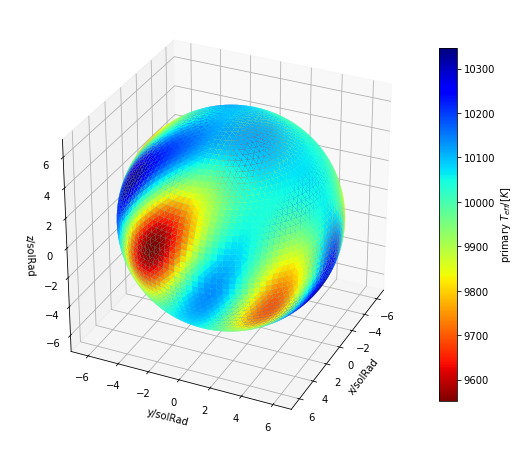

In [29]:
bs.plot.surface(phase=0.05,
                components_to_plot='primary',
                colormap='temperature',
                axis_unit=u.solRad,
                inclination=60
               )